In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## Load MNIST dataset

In [22]:
transform_to_tensor = transforms.ToTensor()
DataLoader = torch.utils.data.DataLoader

train_dataset = torchvision.datasets.MNIST('./data', train=True,download = True, transform=transform_to_tensor)
test_dataset = torchvision.datasets.MNIST('./data', train=False,download = True, transform=transform_to_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


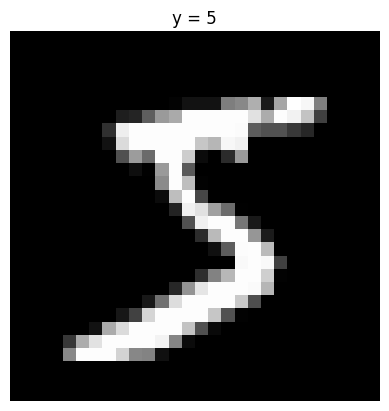

In [21]:
# Show the image data (for checking the data)
# mnist_image, label = 
image, label = train_loader.dataset[0]
plt.imshow(image.permute(1,2,0),cmap='gray')
plt.title(f'y = {label}')
plt.axis('off')
plt.show()

## Define the model

In [27]:
class SoftmaxRegression(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_dim, num_classes)
    def forward(self, x):
        x = x.view(-1, 28 * 28) # reshape to 28x28
        out = self.linear(x) # logits
        return out # CrossEntropyLoss applies softmax autimatically

model = SoftmaxRegression(28*28, 10)

## Loss and Optimizer

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

## Training loop

In [ ]:
num_epochs = 100
for epoch in range(num_epochs):
    # Each training batch has 64 images (we declared)
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() # adjust weights
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, loss: {loss.item()}")

Epoch 0, loss: 0.5894263982772827
Epoch 10, loss: 0.42899268865585327
Epoch 20, loss: 0.12092626094818115
Epoch 30, loss: 0.27032747864723206
Epoch 40, loss: 0.2289130687713623
Epoch 50, loss: 0.1936681717634201
Epoch 60, loss: 0.1723761111497879
Epoch 70, loss: 0.4517572522163391
Epoch 80, loss: 0.14010146260261536
Epoch 90, loss: 0.2210395485162735


# Testing accuracy

In [40]:
with torch.no_grad(): # turn off gradient
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images) # predictions
        _, predicted = torch.max(outputs.data, 1) # pick class with highest score
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Accuracy on test set: {100 * correct/total}")

Accuracy on test set: 92.68
